In [1]:
import csv
from sklearn.metrics import matthews_corrcoef,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as CMD
#matthews corrcoef https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [16]:
# result_file = "country100_results.csv"
result_file =  "US_states_max100_results.csv"

In [17]:
labelspair = []
counter = 0
with open(f'../resultcsv/{result_file}', encoding="utf-8",newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0]=="Gold":
            continue
        labelspair.append(row)


In [18]:
gold = [x[0] for x in labelspair]
predict = [x[1] for x in labelspair]

In [19]:
print(set(gold))

{'Delaware', 'Oklahoma', 'Alaska', 'South Dakota', 'Maine', 'District of Columbia', 'California', 'Oregon', 'Idaho', 'South Carolina', 'North Dakota', 'Utah', 'Mississippi', 'Georgia', 'Massachusetts', 'Ohio', 'Iowa', 'Maryland', 'Virginia', 'Wisconsin', 'Connecticut', 'Florida', 'Kentucky', 'Arkansas', 'Vermont', 'Alabama', 'Pennsylvania', 'Louisiana', 'North Carolina', 'Hawaii', 'New Mexico', 'Arizona', 'Minnesota', 'Missouri', 'West Virginia', 'New York', 'Rhode Island', 'Nevada', 'Tennessee', 'Colorado', 'Illinois', 'Nebraska', 'Indiana', 'New Jersey', 'Washington', 'Wyoming', 'Montana', 'Michigan', 'Texas', 'Kansas'}


In [21]:
# Select specific labels to display and focus on. Other values are changed to label "other"
# selection = ['China', 'Japan', 'Sri Lanka','Australia','United Kingdom','Egypt','United States','Kosovo','Cyprus']
selection = ['Vermont', 'Alabama', 'Pennsylvania', 'Louisiana', 'North Carolina', 'Hawaii', 'New Mexico', 'Arizona', 'Minnesota', 'Missouri','New York']
goldsel = []
predsel = []
for g, p in zip(gold,predict):
   
    if g in selection:
        if p in selection:
            goldsel.append(g)
            predsel.append(p)
        else:
            p = "other"
            goldsel.append(g)
            predsel.append(p)
    else:
        g = "other"
        if p in selection:
            goldsel.append(g)
            predsel.append(p)
        else:
            continue
#             p = "other"
#             goldsel.append(g)
#             predsel.append(p)



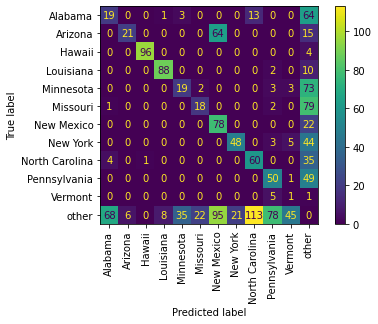

In [22]:
CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical")